## Project : `Fake News Detection_NLP`

## Step 1 : `Introduction` 
Welcome to the project Fake News Detection_NLP.

As we all know that fake news is becomming increasingly prevalent, and it can have serious implications. NLP can be used to detect and classify fake news in order to protect society from its damaging effects. Additionally, NLP can be used to identify topics and trends in news articles, which can be beneficial for research and news outlets

## Step 2 : `Problem Statement`
The main goalof this project is to explore how Natural Language Processing (NLP) can be used to detect and clasify the fake news. We will also explore the different techniques and appproaches that can be used to Indentify and classify fake news and analyze their effectiveness

## Step 2 : `Importing All the Packages`

Let us first import all the neccesary libraries

In [3]:
# pandas library to deal with the DataFrame
# import visualization libraries
# importing `re` for regular expression
# import natural language toolkit 
# import stopwords library to get all english stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')


## Step 3 : `Load the dataset`

In [4]:
df = pd.read_csv("news_data.csv")
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [5]:
# text column
df['text']

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        Ever get the feeling your life circles the rou...
2        Why the Truth Might Get You Fired October 29, ...
3        Videos 15 Civilians Killed In Single US Airstr...
4        Print \nAn Iranian woman has been sentenced to...
                               ...                        
20795    Rapper T. I. unloaded on black celebrities who...
20796    When the Green Bay Packers lost to the Washing...
20797    The Macy’s of today grew from the union of sev...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799      David Swanson is an author, activist, journa...
Name: text, Length: 20800, dtype: object

In [6]:
# dimensions of the data 
df.shape

(20800, 5)

In [7]:
# ckecking for null values 
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

Before going to the next process data prepocessing , first perform the exploratory data analysis 

## Step 3 : `Exploratory Data Analysis`

* #### `How many number of words are there in each text`


In [8]:
# let us split the text column 
def split(x):
    return len(x.split(' '))


In [9]:
# add column to count the number of words in each text
df['word_count'] = df['text'].astype(str).apply(split)
df.head()

,id,title,author,text,label,word_count
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,820
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,727
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1266
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,559
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,154


In [10]:
df[['text','word_count']].head(5) #word count also includes stop words here

,text,word_count
0,House Dem Aide: We Didn’t Even See Comey’s Let...,820
1,Ever get the feeling your life circles the rou...,727
2,"Why the Truth Might Get You Fired October 29, ...",1266
3,Videos 15 Civilians Killed In Single US Airstr...,559
4,Print \nAn Iranian woman has been sentenced to...,154


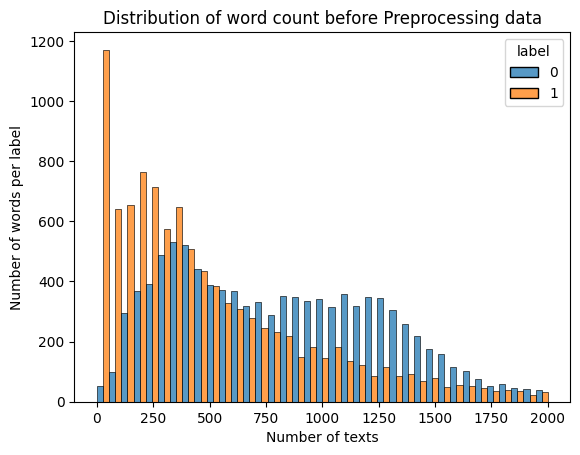

In [11]:
sns.histplot(x = 'word_count', data = df, binrange = [0,2000],multiple='dodge',hue='label')
plt.ylabel('Number of words per label')
plt.title('Distribution of word count before Preprocessing data')
plt.xlabel('Number of texts')
plt.savefig('word count_pre_preprocess')

#### `How many STOP WORDS are there in each text`
To find out the number of stop words present in the each text, let us first download the all english `STOPWORDS` from the `Natural language Toolkit (nltk)` library 

In [12]:
# download all stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
# load the English stopwords
stopwords = set(stopwords.words('english'))


In [14]:
#print list of stopwords 
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [15]:
len(stopwords)

179

Before visualizing the distribustion of stopwords preset in each text data, let us make a column 'stop_words_count' in the DataFrame 

In [16]:
def stopword_count(x):
    list_stop_words = [x for x in x.split(' ') if x in stopwords]
    return len(list_stop_words)

In [17]:
# undate a dataFrame with new feature 'stopwords_count'
df['stopwords_count'] = df['text'].astype(str).apply(stopword_count)

# take a look atr five rows of dataset
df.head()

,id,title,author,text,label,word_count,stopwords_count
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,820,322
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,727,286
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1266,493
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,559,212
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,154,58


Let us plot a Histograme which represents the 'Distribustion of stopwords_count' in ecah text

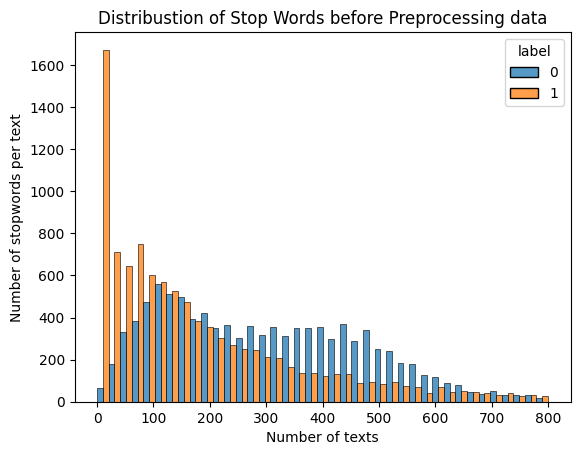

In [18]:
# plot for distribustion of stopwords in wach text 
sns.histplot(x = 'stopwords_count', data = df, binrange= [0,800], multiple = 'dodge', hue = 'label')

# set x axis label 
plt.xlabel("Number of texts")                                       # set x axis label 
plt.ylabel('Number of stopwords per text')                          # set y axis label                          
plt.title("Distribustion of Stop Words before Preprocessing data")  # set title of the plot 
plt.savefig("stopwords_pre_preprocess.png")#  save the figure in workspace
plt.show()                                                          # show the plot 

## Step 4 : `Preprocessing Text Data`

In this preprocessing step I am going to clean the text data for machine leanring. The methods that I am using in this step is as follows 
* Lower casing 
* Removing the stopwords and pancuations
* Performing `stemming`(Finding root words) using `nltk`'s `PorterStemmer`
* Creating a sparse matrix using `CounterVectorizer`
* performing a NLP techniques such as `Bag of Words`

### `Stemming Algoritm: PorterStemming`
`STEMMING` is a technique used in the Natural Language Processing to reduce the words to their root form. 

For EXAMPLE 
* acting, actor, actress --> act
* playing, plays , played --> play

so to reduce the words to their root words we will use the stemming algorithm called `Porter stemming` algorithm

In [19]:
df.head()

,id,title,author,text,label,word_count,stopwords_count
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,820,322
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,727,286
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,1266,493
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,559,212
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,154,58


In [20]:
# drop all nan values
df.dropna(inplace = True)
# check the shape of yhe data set again 
df.shape

(18285, 7)

In [21]:
from nltk.stem.porter import PorterStemmer

In [22]:
# initialize the PorterStemmer
port_stem = PorterStemmer()

In [23]:
# define a stemming function 
def stemming(text):
    # replace any non-alphabet characters in the text with a space character
    stemmed_text = re.sub('[^a-zA-Z]', ' ', text)
    # lower case the each text
    stemmed_text = stemmed_text.lower()
    # split the eaxh text into a list of words
    stemmed_text = stemmed_text.split()
    # generate the list of the root words from the words that we have splited 
    stemmed_text = [port_stem.stem(word) for word in stemmed_text if not word in stopwords]
    # join the each root word from list of stemmed_text seperated with a space 
    stemmed_text = ' '.join(stemmed_text)
    return stemmed_text

In [24]:
df['title'] = df['title'].apply(stemming)
df['title']

0        hous dem aid even see comey letter jason chaff...
1          flynn hillari clinton big woman campu breitbart
2                                     truth might get fire
3                 civilian kill singl us airstrik identifi
4        iranian woman jail fiction unpublish stori wom...
                               ...                        
20795            rapper trump poster child white supremaci
20796      n f l playoff schedul matchup odd new york time
20797    maci said receiv takeov approach hudson bay ne...
20798             nato russia hold parallel exercis balkan
20799                                          keep f aliv
Name: title, Length: 18285, dtype: object

## `Converting the Text data into Numerical Data`

Converting text data into Numerical values is a fundamental step in Natural Language Processes(NLP) tasks. There are severa; techniques are there to convert text adat into numerical. Two of them are 

* ### `Bag Of Words / Count Vectorization `
* It is a NLP technique where we can convert the text adat into the numerical values in the form of matrics, To convert itno numerical values, sklearn library provides a class `CountVectorizer` from `features_extraction.text` module

* ### `Term Frequency-Inverse Document Frequency (TF-IDF) Vectorization:`

* TF-IDF considers not only the frequency of words in a document but also the importance of those words in the entire corpus. It assigns higher weights to words that are frequent in a document but rare in the entire corpus.

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# initialize the CountVectorizer calss
Count_Vectorizer = CountVectorizer()
# fit and transform the text data
X = Count_Vectorizer.fit_transform(df['title'].tolist())

In [26]:
# let us see the shape of the matrix
X.shape

# let us view simplified representation of X
print(X.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [27]:
# import TfidfVectorizer class for converting thext data into numerical
# from sklearn's module called feature_extraction.text
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize the TfidfVectorizer class 
vectorizer = TfidfVectorizer()

# fit and transform the text data
X = vectorizer.fit_transform(df['title'].tolist())


In [28]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [29]:
# tarhet data 
y = df['label'].values
y



array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

## Step 5: `Spliting Data into train and test set`

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 49)

In [31]:
print('The shape of X_train is:', X_train.shape[0])
print('The shape of X_test is:', X_test.shape[0])


The shape of X_train is: 14628
The shape of X_test is: 3657


## Step 6: `Creating the Model`

### `DecisionTreeClassifier` 

In [32]:
# import DecisionTreeClassifier from sklearn's tree module
from sklearn.tree import DecisionTreeClassifier

# import accuracy_score function to calculate the accuracy from sklearn's metrics module
from sklearn.metrics import accuracy_score

# import confustion_matrix function to calculate the accuracy from sklearn's metrics module
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Create a Decision Tree classifier model with random seed
model = DecisionTreeClassifier(max_depth = 58,random_state=42)

# fit y=the model to the X_train , y_train 
model.fit(X_train , y_train )

# make a prediction on test data set (X_test)
predictions = model.predict(X_test)

# Evaluate the model's performance by calulating the accuracy_score
# precision_score, recall_score, f1_score
accuracy_score = accuracy_score(predictions, y_test)
precision_score = precision_score(predictions, y_test)
recall_score = recall_score(predictions, y_test)
f1_score = f1_score(predictions, y_test)

In [33]:
#the confusion_matrix
confusion_matrix = confusion_matrix(predictions, y_test)
confusion_matrix

array([[1900,   63],
       [ 226, 1468]], dtype=int64)

In [34]:
# performance of the model DecisionTreeClassifier

print('Accuracy_score : ', accuracy_score)
print('precision_score : ', precision_score)
print('recall_score : ', recall_score)
print('f1_score : ', f1_score)


Accuracy_score :  0.9209734755263878
precision_score :  0.9588504245591117
recall_score :  0.8665879574970484
f1_score :  0.9103875968992249


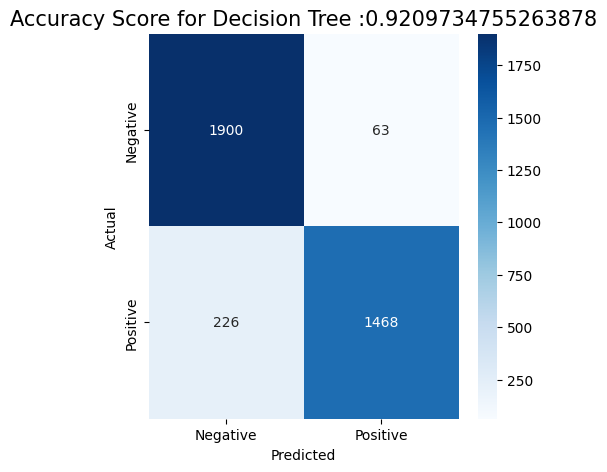

In [35]:
# Define class labels
class_names = ['Negative', 'Positive']

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Accuracy Score for Decision Tree :{}'.format(accuracy_score), size = 15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### `RandomForestClassifier`

In [36]:
# import RnadomForestClassifier from sklearn's ensemble module
from sklearn.ensemble import RandomForestClassifier

# import accuracy_score function to calculate the accuracy from sklearn's metrics module
from sklearn.metrics import accuracy_score

# import confustion_matrix function to calculate the accuracy from sklearn's metrics module
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Create a RandomFprestClassifier model 
model = RandomForestClassifier(random_state = 42)

# fit y=the model to the X_train , y_train 
model.fit(X_train , y_train )

# make a prediction on test data set (X_test)
predictions = model.predict(X_test)

# Evaluate the model's performance by calulating the accuracy_score
# precision_score, recall_score, f1_score
accuracy_score = accuracy_score(predictions, y_test)
precision_score = precision_score(predictions, y_test)
recall_score = recall_score(predictions, y_test)
f1_score = f1_score(predictions, y_test)

In [37]:
#the confusion_matrix
confusion_matrix = confusion_matrix(predictions, y_test)
confusion_matrix

array([[1939,   35],
       [ 187, 1496]], dtype=int64)

In [38]:
# performance of the model DecisionTreeClassifier

print('Accuracy_score : ', accuracy_score)
print('precision_score : ', precision_score)
print('recall_score : ', recall_score)
print('f1_score : ', f1_score)

Accuracy_score :  0.9392945036915504
precision_score :  0.977139124755062
recall_score :  0.8888888888888888
f1_score :  0.9309271935283137


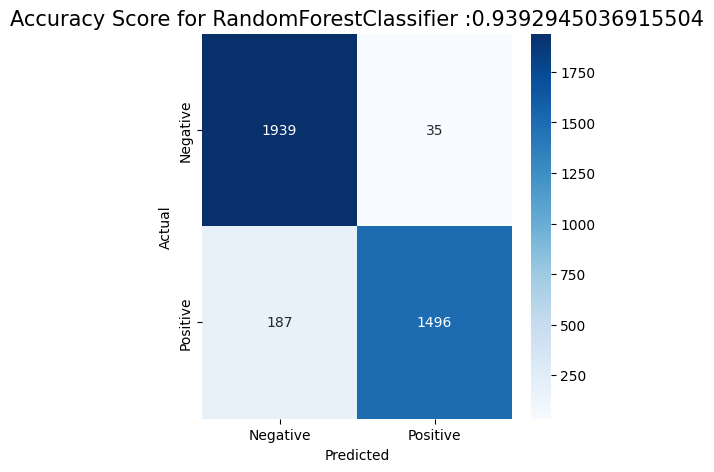

In [39]:
# Define class labels
class_names = ['Negative', 'Positive']

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Accuracy Score for RandomForestClassifier :{}'.format(accuracy_score), size = 15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### `Naive Bayes : MultinomialNB`

In [40]:
# import MultinomialNB model from sklearn's navie_bayes module
from sklearn.naive_bayes import MultinomialNB

# import accuracy_score function to calculate the accuracy from sklearn's metrics module
from sklearn.metrics import accuracy_score

# import confustion_matrix function to calculate the accuracy from sklearn's metrics module
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Create a navie bayes's MultinomialNB model 
model = MultinomialNB()

# fit the model to the X_train , y_train 
model.fit(X_train , y_train )

# make a prediction on test data set (X_test)
predictions = model.predict(X_test)

# Evaluate the model's performance by calulating the accuracy_score
# precision_score, recall_score, f1_score
accuracy_score = accuracy_score(predictions, y_test)
precision_score = precision_score(predictions, y_test)
recall_score = recall_score(predictions, y_test)
f1_score = f1_score(predictions, y_test)

In [41]:
#the confusion_matrix
confusion_matrix = confusion_matrix(predictions, y_test)
confusion_matrix

array([[2074,  431],
       [  52, 1100]], dtype=int64)

In [42]:
# performance of the model DecisionTreeClassifier

print('Accuracy_score : ', accuracy_score)
print('precision_score : ', precision_score)
print('recall_score : ', recall_score)
print('f1_score : ', f1_score)

Accuracy_score :  0.8679245283018868
precision_score :  0.7184846505551927
recall_score :  0.9548611111111112
f1_score :  0.8199776369735371


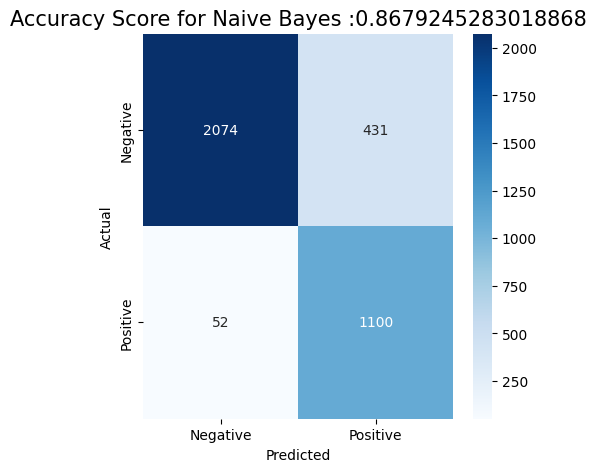

In [43]:
# Define class labels
class_names = ['Negative', 'Positive']

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Accuracy Score for Naive Bayes :{}'.format(accuracy_score), size = 15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### `XGBoost`

In [44]:
# import MultinomialNB model from sklearn's navie_bayes module
import xgboost

# import accuracy_score function to calculate the accuracy from sklearn's metrics module
from sklearn.metrics import accuracy_score

# import confustion_matrix function to calculate the accuracy from sklearn's metrics module
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Create XGBClassifier model 
model = xgboost.XGBClassifier()

# fit the model to the X_train , y_train 
model.fit(X_train , y_train )

# make a prediction on test data set (X_test)
predictions = model.predict(X_test)

# Evaluate the model's performance by calulating the accuracy_score
# precision_score, recall_score, f1_score
accuracy_score = accuracy_score(predictions, y_test)
precision_score = precision_score(predictions, y_test)
recall_score = recall_score(predictions, y_test)
f1_score = f1_score(predictions, y_test)

In [45]:
#the confusion_matrix
confusion_matrix = confusion_matrix(predictions, y_test)
confusion_matrix

array([[1895,   40],
       [ 231, 1491]], dtype=int64)

In [46]:
# performance of the model DecisionTreeClassifier

print('Accuracy_score : ', accuracy_score)
print('precision_score : ', precision_score)
print('recall_score : ', recall_score)
print('f1_score : ', f1_score)

Accuracy_score :  0.9258955427946404
precision_score :  0.9738732854343566
recall_score :  0.8658536585365854
f1_score :  0.9166922840454963


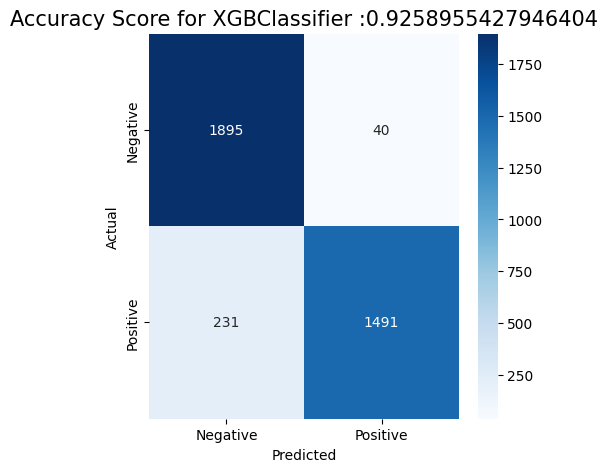

In [47]:
# Define class labels
class_names = ['Negative', 'Positive']

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Accuracy Score for XGBClassifier :{}'.format(accuracy_score), size = 15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### `SVM`

In [48]:
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report

# import confustion_matrix function to calculate the accuracy from sklearn's metrics module
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Create an SVM classifier (SVC)
svm_classifier = SVC(kernel='linear')

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
predictions = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_score= accuracy_score(y_test, predictions)
precision_score = precision_score(predictions, y_test)
recall_score = recall_score(predictions, y_test)
f1_score = f1_score(predictions, y_test)

In [49]:
#the confusion_matrix
confusion_matrix = confusion_matrix(predictions, y_test)
confusion_matrix

array([[1929,   47],
       [ 197, 1484]], dtype=int64)

In [50]:
# performance of the model DecisionTreeClassifier

print('Accuracy_score : ', accuracy_score)
print('precision_score : ', precision_score)
print('recall_score : ', recall_score)
print('f1_score : ', f1_score)

Accuracy_score :  0.9332786436970194
precision_score :  0.969301110385369
recall_score :  0.8828078524687686
f1_score :  0.9240348692403487


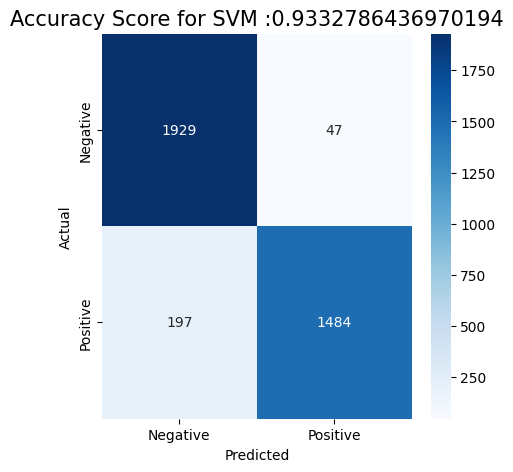

In [51]:
# Define class labels
class_names = ['Negative', 'Positive']

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Accuracy Score for SVM :{}'.format(accuracy_score), size = 15)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Step 7 : `Results`
* Accuracy_score for Rnadom Forest :  93.9 %
* Accuracy_score for SVM :  93.3 %
* Accuracy_score for Decision Tree:  92 %
* Accuracy_score for XGBoost :  92.58 %
* Accuracy_score for MultinomialNB :  86.79 % 

## `Random Forest algorithm performing very Well compared to other with accuracy ~ 94 %`